#**GDG TASK 4**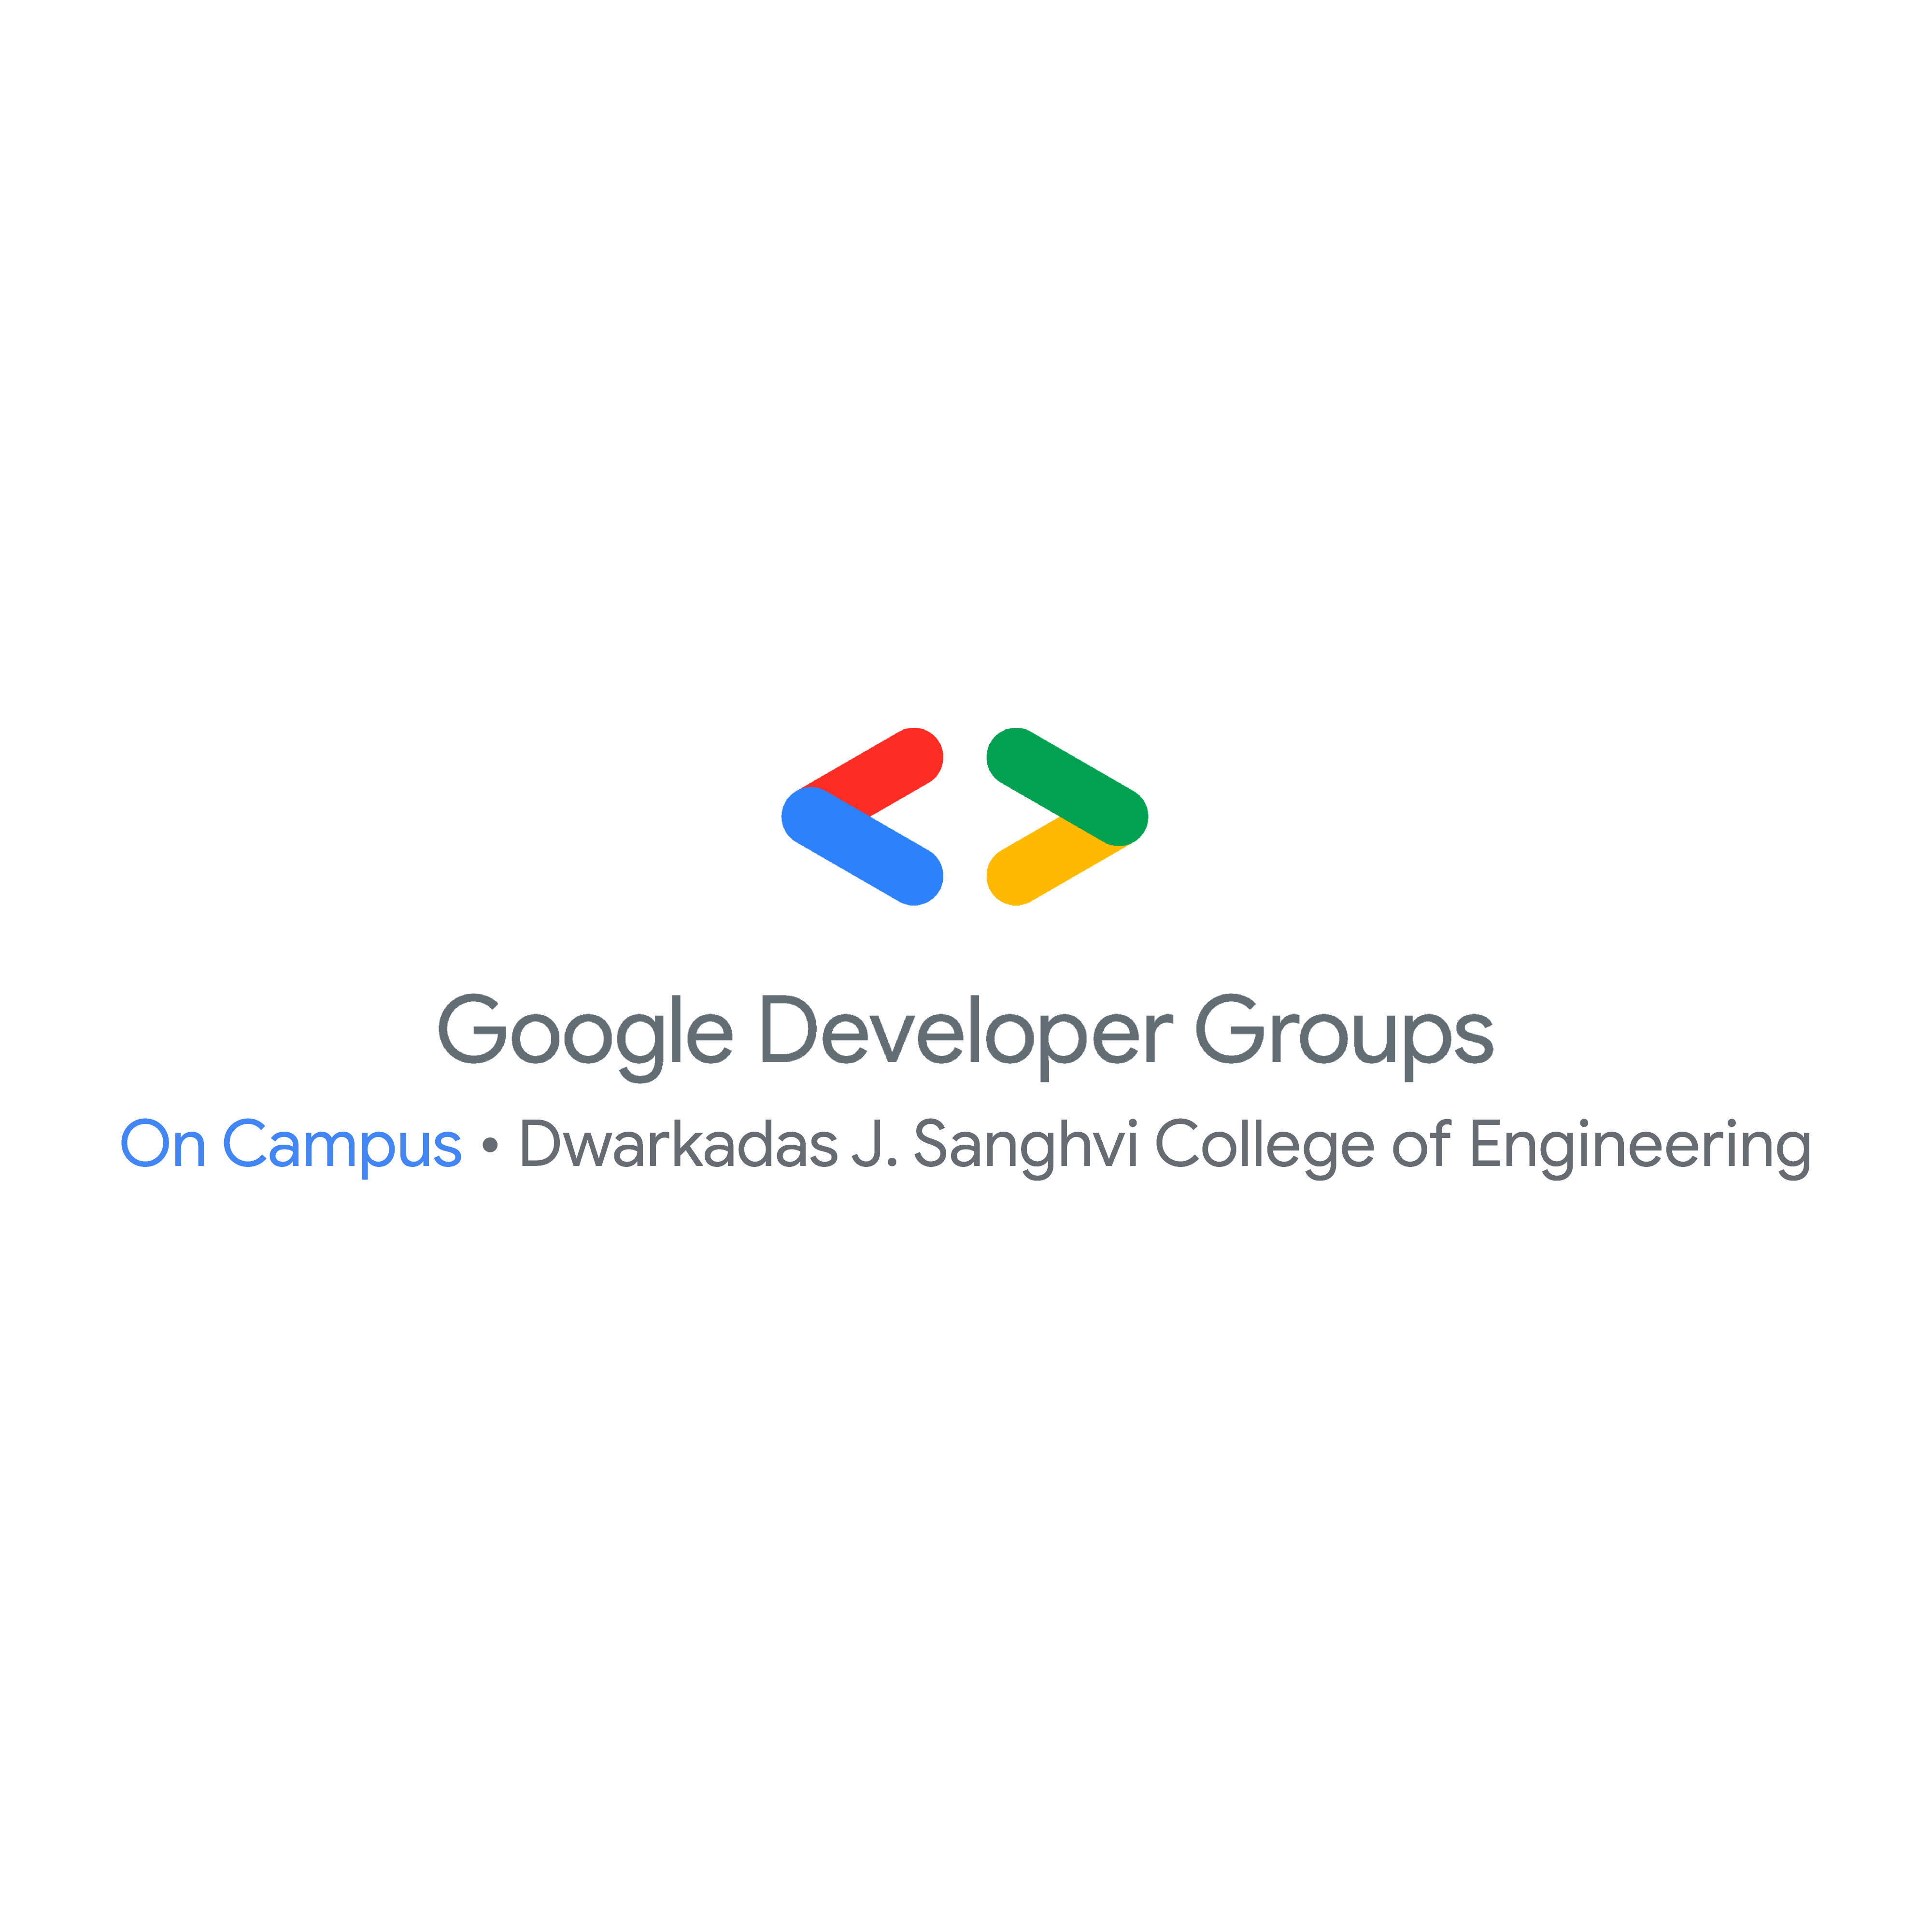

In the task for this week, we will be exploring another ML Models like Decision Tree, Random Forest and Naive Bayes. We will also learn hyperparameter tuning using ensemble techniques (Bagging & Boosting) and Decision Tree Pruning.

**This Task has various theory questions to be answered here and there. Don't miss out on those, as they will make you'll conceptually stronger, and give a better understanding.**

### Overfitting and Underfitting [VERY IMPORTANT]:
https://www.youtube.com/watch?v=T9NtOa-IITo
Note : This concept can be seen in K Means and decision trees. In fact, we will look deeper into
this when we begin deep learning.

# Decision Tree Classifier

* Theory : https://youtu.be/7VeUPuFGJHk
* Theory: https://www.analyticsvidhya.com/blog/2021/08/decision-tree-algorithm/
* Implementation : https://youtu.be/HY2DcBhgwm0

Load the titanic dataset in a pandas dataframe (download dataset from https://www.kaggle.com/c/titanic/data and store it in the "Synapse" folder initially created for the interview tasks) Note that you have to download the train and test csv files seperately

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<b>Read the titanic_data.csv using pandas and show the dataframe</b>

In [31]:
#write code here
import pandas as pd

train_df = pd.read_csv("/content/drive/MyDrive/GDG Datasets/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/GDG Datasets/test.csv")
df = pd.concat([train_df, test_df], ignore_index=True)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Visualizing hidden Details

* print the name column of the data
* notice that the word after the first comma encapsulates the title of the person (Mr., Mrs, etc)
* extract the title using regular expression (help given below in the code)
* store the title in a new column in the dataframe. Name the column : Title

In [32]:
# try researching about regex
print(train_df["Name"])
train_df["Title"] = train_df['Name'].str.extract(r',\s*([^\.]+)\.')
train_df

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


### Removing unnecessary columns
*   The columns PassengerId and Ticket play no logical role in being related to the survival of a passenger. Hence we will remove them.
*   We will also remove the Name column as we have done feature extraction and obtained titles instead. (test set might have extra titles which are not in the train set. Think about how we would consider them. This however doesn't affect task 1's objective)

In [33]:
#write code here
train_df = train_df.drop(columns=['PassengerId', 'Ticket', 'Name'])

### Nan analysis
*   write code to find the percentage of Nans in each column and visualize it in a tabular format
*   remove any column having more than 50% Nans as they would be of no use

In [34]:
#write code here
nan_percentage = (train_df.isnull().sum() / len(train_df)) * 100
print(nan_percentage)

nan_summary = pd.DataFrame({
    'Column': nan_percentage.index,
    'NaN Percentage': nan_percentage.values
}).sort_values(by='NaN Percentage', ascending=False)
print(nan_summary)

columns_to_remove = nan_summary[nan_summary['NaN Percentage'] > 50]['Column']
train_df = train_df.drop(columns=columns_to_remove)

print(f"Columns removed: {list(columns_to_remove)}")

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
Title        0.000000
dtype: float64
     Column  NaN Percentage
7     Cabin       77.104377
3       Age       19.865320
8  Embarked        0.224467
0  Survived        0.000000
1    Pclass        0.000000
2       Sex        0.000000
4     SibSp        0.000000
5     Parch        0.000000
6      Fare        0.000000
9     Title        0.000000
Columns removed: ['Cabin']


*   Fill Nans in the Embark column with the statistical mode
*   Fill Nans in the Age column with it's statistical mean

In [35]:
#write code here
embark_mode = train_df['Embarked'].mode()[0]
train_df['Embarked'] = train_df['Embarked'].fillna(embark_mode)

age_mean = train_df['Age'].mean()
train_df['Age'] = train_df['Age'].fillna(age_mean)

train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.000000,1,0,7.2500,S,Mr
1,1,1,female,38.000000,1,0,71.2833,C,Mrs
2,1,3,female,26.000000,0,0,7.9250,S,Miss
3,1,1,female,35.000000,1,0,53.1000,S,Mrs
4,0,3,male,35.000000,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Rev
887,1,1,female,19.000000,0,0,30.0000,S,Miss
888,0,3,female,29.699118,1,2,23.4500,S,Miss
889,1,1,male,26.000000,0,0,30.0000,C,Mr


### Adding features to the dataset
*   Read the kaggle link (titanic dataset) provided above and see what the two columns SibSP and Parch signify
*   Using that create a new column called **Family_members**
*   Fill it with the sum of SibSP and Parch

In [36]:
#write code here
# sibsp : no. of siblings or spuse and parch is no. of parent or children

train_df['Family_members'] = train_df['SibSp'] + train_df['Parch']

In [37]:
#Normalize the columns ("Age", "Fare", "Family_members")
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_df[['Age', 'Fare', 'Family_members']] = scaler.fit_transform(train_df[['Age', 'Fare', 'Family_members']])

In [38]:
#apply one hot encoding on the columns ('Pclass','Sex','Title','Embarked')
train_df = pd.get_dummies(train_df, columns=['Pclass', 'Sex', 'Title', 'Embarked'])

In [39]:
train_df

,Survived,Age,SibSp,Parch,Fare,Family_members,Pclass_1,Pclass_2,Pclass_3,Sex_female,...,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Embarked_C,Embarked_Q,Embarked_S
0,0,0.271174,1,0,0.014151,0.1,False,False,True,False,...,False,True,False,False,False,False,False,False,False,True
1,1,0.472229,1,0,0.139136,0.1,True,False,False,True,...,False,False,True,False,False,False,False,True,False,False
2,1,0.321438,0,0,0.015469,0.0,False,False,True,True,...,False,False,False,False,False,False,False,False,False,True
3,1,0.434531,1,0,0.103644,0.1,True,False,False,True,...,False,False,True,False,False,False,False,False,False,True
4,0,0.434531,0,0,0.015713,0.0,False,False,True,False,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0.334004,0,0,0.025374,0.0,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
887,1,0.233476,0,0,0.058556,0.0,True,False,False,True,...,False,False,False,False,False,False,False,False,False,True
888,0,0.367921,1,2,0.045771,0.3,False,False,True,True,...,False,False,False,False,False,False,False,False,False,True
889,1,0.321438,0,0,0.058556,0.0,True,False,False,False,...,False,True,False,False,False,False,False,True,False,False


<b>extract the y label (survived) from the dataframe and store it in a new variable</b>

In [40]:
#write code here
y = train_df['Survived']

<b>remove the y_label (survived) from the dataframe</b>

In [41]:
#write code here
train_df = train_df.drop(columns=['Survived'])

<b>Split the data into train and test. (do a split in the ratio 70:30)</b>

In [42]:
#write code here
from sklearn.model_selection import train_test_split
x = train_df
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

<b>Now that you have the entire preprocessed and split data, implement the decision tree algorithm from sklearn and fit it to this dataset</b> <br>



In [43]:
#write code here
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)

y_pred = dt_model.predict(x_test)




<b>Print the Model Accuracy</b>

In [45]:
#write code here
accuracy = dt_model.score(x_test, y_test)

accuracy

0.7761194029850746

## Explain: Give a Real life Example where Decision Tree Classifier can be used.

Ans:
We can use DTC for loan classification as well as medical diagnosis
loan classification : credit, dependents, debt to income ratio
medical diagnosis : symptom basis classification levels

Now that you have your first result, make sure that you play with the hyperparameters to get a better result. Visualize results, try different hyperparameters by using a loop, GET CREATIVE!<br>

Machine learning is an iteritive process. You will have to keep playing with hyperparameters and algorithms. No fixed algorithm will work on a fixed dataset.

Take this up as a challenge. The person with the best accuracy wins the round!

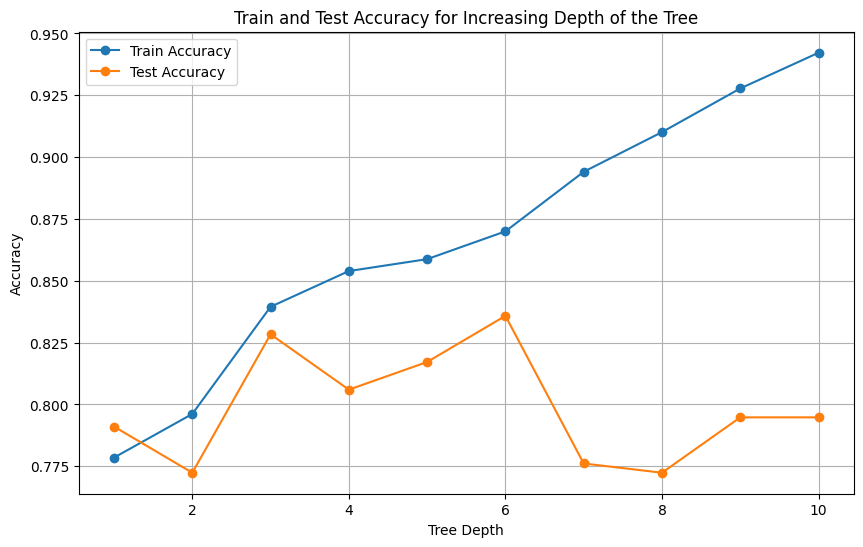

In [47]:
#plot a graph that shows the train and test accuracy for increasing depth of the tree (do for 10)
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

train_accuracies = []
test_accuracies = []

for depth in range(1, 11):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_model.fit(x_train, y_train)

    y_train_pred = dt_model.predict(x_train)
    y_test_pred = dt_model.predict(x_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), train_accuracies, label='Train Accuracy', marker='o')
plt.plot(range(1, 11), test_accuracies, label='Test Accuracy', marker='o')
plt.title('Train and Test Accuracy for Increasing Depth of the Tree')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

#reference taken : https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

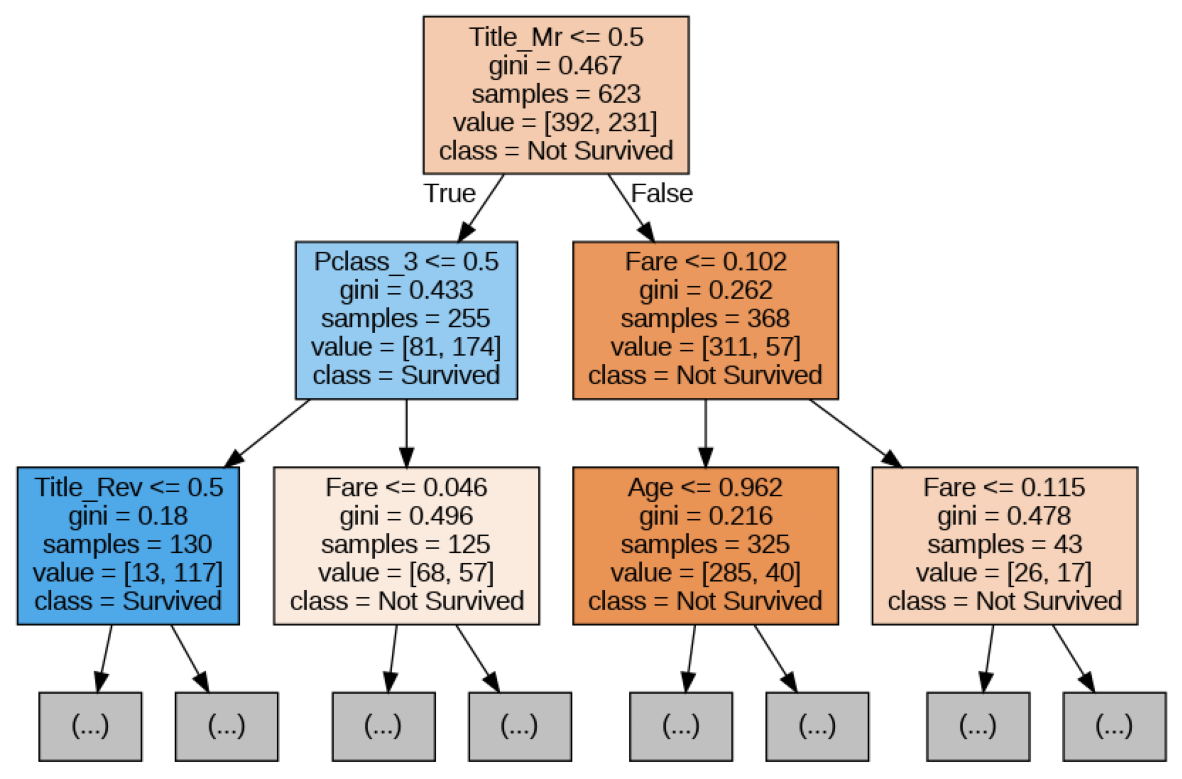

In [49]:
#complete the code below to create an image of the decision tree
from sklearn import tree
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

!pip install graphviz

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)

tree.export_graphviz(dt_model, out_file='tree.dot', feature_names=x_train.columns,
                     class_names=['Not Survived', 'Survived'], max_depth=2, filled=True)

!dot -Tpng tree.dot -o tree.png

image = mpimg.imread('tree.png')
plt.figure(figsize=(15, 15))
plt.imshow(image)
plt.axis('off')
plt.show()


<b>print the test accuracy and train accuracy here</b>

In [50]:
#write code here
print(train_acc)
print(test_acc)

0.942215088282504
0.7947761194029851


## Explain: What is your understanding of the charts you made above?

Ans:
We can see how depths affect performance of the model

for eg the train data even on increasing depth that is increased complexity goes higher but the test data gets influenced by noise and the training data too much i.e. overfitting
we can conclude that while generalizing on basis of tree depth decision tree may lose their touch.

# Naive Bayes Algorithm

* Theory : https://youtu.be/jS1CKhALUBQ
* Theory:
https://www.analyticsvidhya.com/blog/2021/09/naive-bayes-algorithm-a-complete-guide-for-data-science-enthusiasts/
* Implementation : https://youtu.be/nHIUYwN-5rM

In [51]:
# Write a code to implement naive bayes algorithm, and give the accuracy for the same
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()

nb_model.fit(x_train, y_train)

y_pred = nb_model.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.6119402985074627

## Explain: What is the difference between Decision Tree Classifier and Naive Bayes algorithm?

Ans:
One basic difference is that DTC makes use of splitting data based on feature value and NB assumes all values are independent, so it takes probabilities for each class based on features

## Optimizing Methods

We can even use Ensemble Methods like **bagging (random forest)**, **boosting (adaboost)** and **Pruning** to improve your accuracy. Again creating a loop of hyperparameters and then finding the best among them is a daunting task. To reduce the efforts, we can use a special technique known as **GridSearchCV**. It finds the best hyperparameters for your model without you having to write multiple loops and evaluating them.

1. GridSearchCV for Random Forest Classifier: https://youtu.be/c4mS7KaOIGY
2. GridSearchCV for Adaboost Classifier: https://youtu.be/JmXnztjULnQ

### 1. Bagging

* Theory : https://www.youtube.com/watch?v=KIOeZ5cFZ50
* Theory :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* Implementation : https://www.youtube.com/watch?v=MxiktOPmhV8&t=2s

In [52]:
#write code here
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf_model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(x_train, y_train)

print("Best Parameters: ", grid_search.best_params_)

best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the best model: {accuracy * 100:.2f}%")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters:  {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy of the best model: 81.72%


## Explain: Under what condition will Random Forest and Decision Trees have the same accuracy?

Ans:

According to me when the forest contains only 1 tree.

## Extra - BaggingClassifier

In [ ]:
#write a code to implement BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier


## Explain: What is the difference between Random Forest and Bagging Classifier

Ans:

### 2. Boosting

* Theory : https://www.youtube.com/watch?v=NLRO1-jp5F8&t=724s
* Theory :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
* Implementation : https://www.youtube.com/watch?v=7xHM93WXOu8

In [ ]:
#write code here
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score


## Explain: What is the difference between Bagging and Boosting?

Ans:

### 3. Pruning Techniques

https://towardsdatascience.com/build-better-decision-trees-with-pruning-8f467e73b107

In [ ]:
#write code here
from sklearn.metrics import make_scorer
from sklearn.model_selection import ParameterGrid


In [ ]:
#plot a tree (image) similar to one created for decision tree (graphwiz) for the pruning technique


<b>Note that the accuracy on the test set will be considered and brownie points for *not* overfitting the model in the process</b>

## Explain: After studying these techniques, analyse which method gives you the best accuracy and choose it as your most optimal model.

Ans:


# **Compulsory Task**

Research and create a short blog on the topic of **XG Boost and AdaBoost Classifier and Regressor**.



XGBoost (Extreme Gradient Boosting) and AdaBoost (Adaptive Boosting) are two powerful boosting algorithms that enhance predictive accuracy by combining multiple weak learners into a strong model.

AdaBoost focuses on sequentially training models, giving more weight to misclassified data points in each iteration, making it well-suited for tasks with simpler datasets.

On the other hand, XGBoost takes gradient boosting to the next level with advanced features like
- regularization
- parallel processing
- efficient handling of missing values
making it ideal for large-scale datasets and complex problems.

While both algorithms shine in different scenarios, their strengths diverge.

:> AdaBoost is simpler to implement and interpret, making it great for beginners or smaller projects, though it can be sensitive to noisy data.

:> XGBoost, though more computationally intensive, often outperforms due to its scalability and ability to handle high-dimensional data.

Choosing between them depends on the task's complexity, dataset size, and need for computational efficiency.


References :
1. https://spotintelligence.com/2023/08/21/adaboost-practical-introduction-with-how-to-python-tutorial-for-classification-regression/

2. https://mljourney.com/adaboost-vs-xgboost-a-comprehensive-comparison/

# **End of Task**

